In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pprint
import rasterio
import os

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/DO_AN


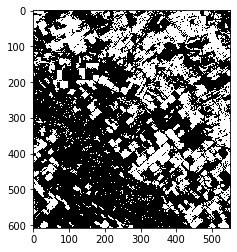

In [4]:
a = cv2.imread('result/result_1img.tif')
a= a*255
plt.imshow(a)

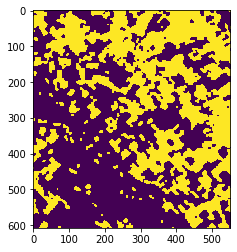

In [5]:
b = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

closing = cv2.morphologyEx(b, cv2.MORPH_CLOSE, kernel3)
for i in range(5):
    closing = cv2.morphologyEx(closing, cv2.MORPH_CLOSE, kernel2)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel2)
del closing
for i in range(5):
    opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel2)
input_img = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel3)


plt.imshow(input_img)
# print(input_img)
# print(a.shape)

In [6]:
im2, contours, hierarchy = cv2.findContours(input_img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE) 
#danh sach contour khong co lo
list_contour_not_holes = []
#danh sach cac contour co lo
list_contour_holes = []
parents = []

for i in range(len(contours)):
    if hierarchy[0][i][2] < 0 and hierarchy[0][i][3] < 0 :
        list_contour_not_holes.append(contours[i])
    if hierarchy[0][i][3] > 0  :
        parents.append(hierarchy[0][i][3])
        list_contour_holes.append(contours[i])

# parents = unique(parents)


#danh sach cac contour la cha, moi danh sach thi thang dau luon la cha
list_list_contour_parent = []

for i in range(len(parents)):
    contour_parent = [contours[parents[i]]]
    for j in range(len(contours)):
        if hierarchy[0][j][3] == parents[i]:
            contour_parent.append(contours[j])
    list_list_contour_parent.append(contour_parent)

# chua 2 thu la list polygon khong co lo, va list cac contour co lo
polygons_result = [list_contour_not_holes, list_list_contour_parent]

# print(polygons_result)
# plt.imshow(polygons_result)
mask = np.zeros(input_img.shape, np.uint8)
for i in range(len(polygons_result)):
  f = cv2.drawContours(mask, [polygons_result[i][1]], -1, 255, -1)
plt.imshow(f)


TypeError: ignored

[[[392 607]]]


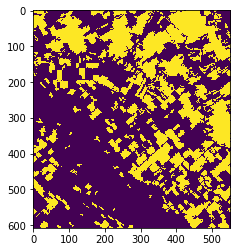

In [8]:
b = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
# im2, contours, hierarchy = cv2.findContours(input_img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
im2, contours, hierarchy = cv2.findContours(b, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
mask = np.zeros(input_img.shape, np.uint8)
for i in range(len(contours)):
  if contour_sizes[i][0] > 20:
    f = cv2.drawContours(mask, [contour_sizes[i][1]], -1, 255, -1)
print(contour_sizes[1][1])
plt.imshow(f)

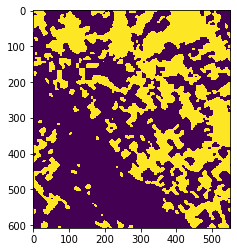

In [10]:
# b = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

closing = cv2.morphologyEx(f, cv2.MORPH_CLOSE, kernel3)
for i in range(3):
    closing = cv2.morphologyEx(closing, cv2.MORPH_CLOSE, kernel2)
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel2)
del closing
for i in range(3):
    opening = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel2)
input_img = cv2.morphologyEx(opening, cv2.MORPH_OPEN, kernel3)


plt.imshow(input_img)

(608, 552)


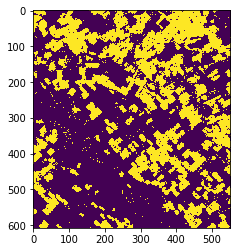

In [0]:
b = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
# ret, thresh = cv2.threshold(b, 130, 255, 0)
im2, contours, hierarchy = cv2.findContours(b, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# print(hierarchy)
print(b.shape)
plt.imshow(b)

(608, 552)


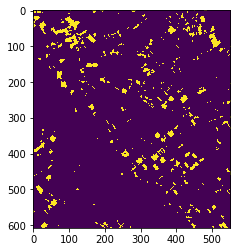

In [0]:
for i in contours:
  if cv2.contourArea(i) > 0:
    cv2.drawContours(b, i, -1, (0,255,0), 3)
#     cv2.fillPoly(a, i, 255)
  else:
    cv2.drawContours(b, i, -1, (0,0,0), 3)
plt.imshow(b)
print(b.shape)

In [0]:
for i in contours:
  cv2.drawContours(a, i, -1, (0,255,0), 3)
  cv2.fillPoly(a, i, 255)
plt.imshow(a)
print(a)

(608, 552, 3)


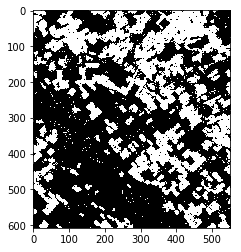

In [0]:
for i in contours:
  if cv2.contourArea(i) >= 10:
    cv2.drawContours(a, i, -1, (255,255,255), 3)
#     cv2.fillPoly(a, i, 255)
#   else:
#     cv2.drawContours(a, i, -1, (0,0,0), 3)
print(a.shape)
plt.imshow(a)

In [0]:
# g = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)
profiles = []
image_list = os.listdir('img')
for image in image_list:
    with rasterio.open('img/{}'.format(image)) as src:
        profile = src.profile
        profile.update(
            dtype=rasterio.uint8,
            count=1,
            compress='lzw')
    with rasterio.open('./result/result_11{}'.format(image),'w',**profile) as dst:
        dst.write(input_img.astype(np.uint8), indexes=1)